In [1]:
import numpy as np

In [21]:
import math

In [22]:
import matplotlib.pyplot as plt

In [23]:
func = lambda x : np.log(x**3)

In [24]:
nodes = np.array([0.2, 0.2, 0.3])

In [44]:
values = np.array([func(0.2), 15, func(0.3)])

In [61]:
def divided_diff(nodes, values, l, r):
    if nodes[l] == nodes[r]:
        return values[np.argmax(nodes == nodes[l]) + r - l] / math.factorial(r - l)
    return (divided_diff(nodes, values, l + 1, r) - divided_diff(nodes, values, l, r - 1)) / (nodes[r] - nodes[l])
    

In [83]:
def hermit(nodes, values, x):
    res = 0
    product = 1
    
    for i in range(len(values)):
        curr = divided_diff(nodes, values, 0, i) * product
        res += curr
        product *= x - nodes[i]
        
    return res

In [84]:
x_axis = np.linspace(0.2, 0.3, 100)

In [96]:
y_axis_exact = func(x_axis)

In [97]:
y_axis_hermit = hermit(nodes, values, x_axis)

In [98]:
def absolute_error(abs_value, apr_value):
    return abs_value - apr_value

In [99]:
def relative_error(abs_value, apr_value):
    return absolute_error(abs_value, apr_value) / abs_value

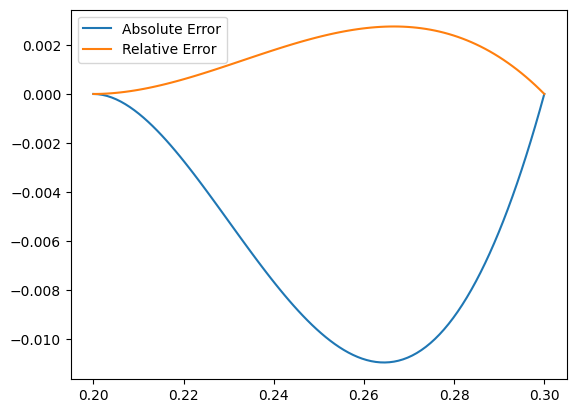

In [105]:
plt.plot(x_axis, absolute_error(y_axis_exact, y_axis_hermit)) 
plt.plot(x_axis, relative_error(y_axis_exact, y_axis_hermit))
plt.legend(["Absolute Error","Relative Error"])
plt.show()